In [736]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [737]:
data=pd.read_csv("covid_19_india.csv")

In [738]:
data.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [739]:
# Creating a new column as days since start
data['days_since_start']=data['Sno']-1
data.head(5)

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  days_since_start  
0                        0      0       0          1                 0  
1                        0      0       0          1                 1  
2                        0      0       0          2                 2  
3                        0      0       0          3                 3  
4                        0      0       0          3                 4

In [740]:
# Dropping time column as it is of no use here
data=data.drop(['Time'],axis=1)
Date=data['Date'].drop_duplicates()
print(Date)

0       30/01/20
1       31/01/20
2       01/02/20
3       02/02/20
4       03/02/20
          ...   
5161    14/08/20
5196    15/08/20
5231    16/08/20
5266    17/08/20
5301    18/08/20
Name: Date, Length: 202, dtype: object


In [741]:
# Creating data for India from given data
India_Confirmed=[]
India_Death=[]
India_Cured=[]
dict={}
for date in Date:
    India_Confirmed.append(data.loc[data['Date'] == date, 'Confirmed'].sum())
    India_Death.append(data.loc[data['Date'] == date, 'Deaths'].sum())
    India_Cured.append(data.loc[data['Date'] == date, 'Cured'].sum())

## Analysis of India's confirmed, cured, deaths and Active cases

In [742]:
data_India=pd.DataFrame(list(zip(Date, India_Confirmed,India_Death,India_Cured)),columns=['Date','Confirmed','India_Death','India_Cured'])
data_India['India_Active']=data_India['Confirmed']-data_India['India_Death']-data_India['India_Cured']
data_India['days_since_start']=data['days_since_start']
print(data_India)

         Date  Confirmed  India_Death  India_Cured  India_Active  \
0    30/01/20          1            0            0             1   
1    31/01/20          1            0            0             1   
2    01/02/20          2            0            0             2   
3    02/02/20          3            0            0             3   
4    03/02/20          3            0            0             3   
..        ...        ...          ...          ...           ...   
197  14/08/20    2461190        48040      1751555        661595   
198  15/08/20    2526192        49036      1808936        668220   
199  16/08/20    2589682        49980      1862258        677444   
200  17/08/20    2647663        50921      1919842        676900   
201  18/08/20    2702742        51797      1977779        673166   

     days_since_start  
0                   0  
1                   1  
2                   2  
3                   3  
4                   4  
..                ...  
197            

Text(0.5, 1.0, 'Active Cases in India')

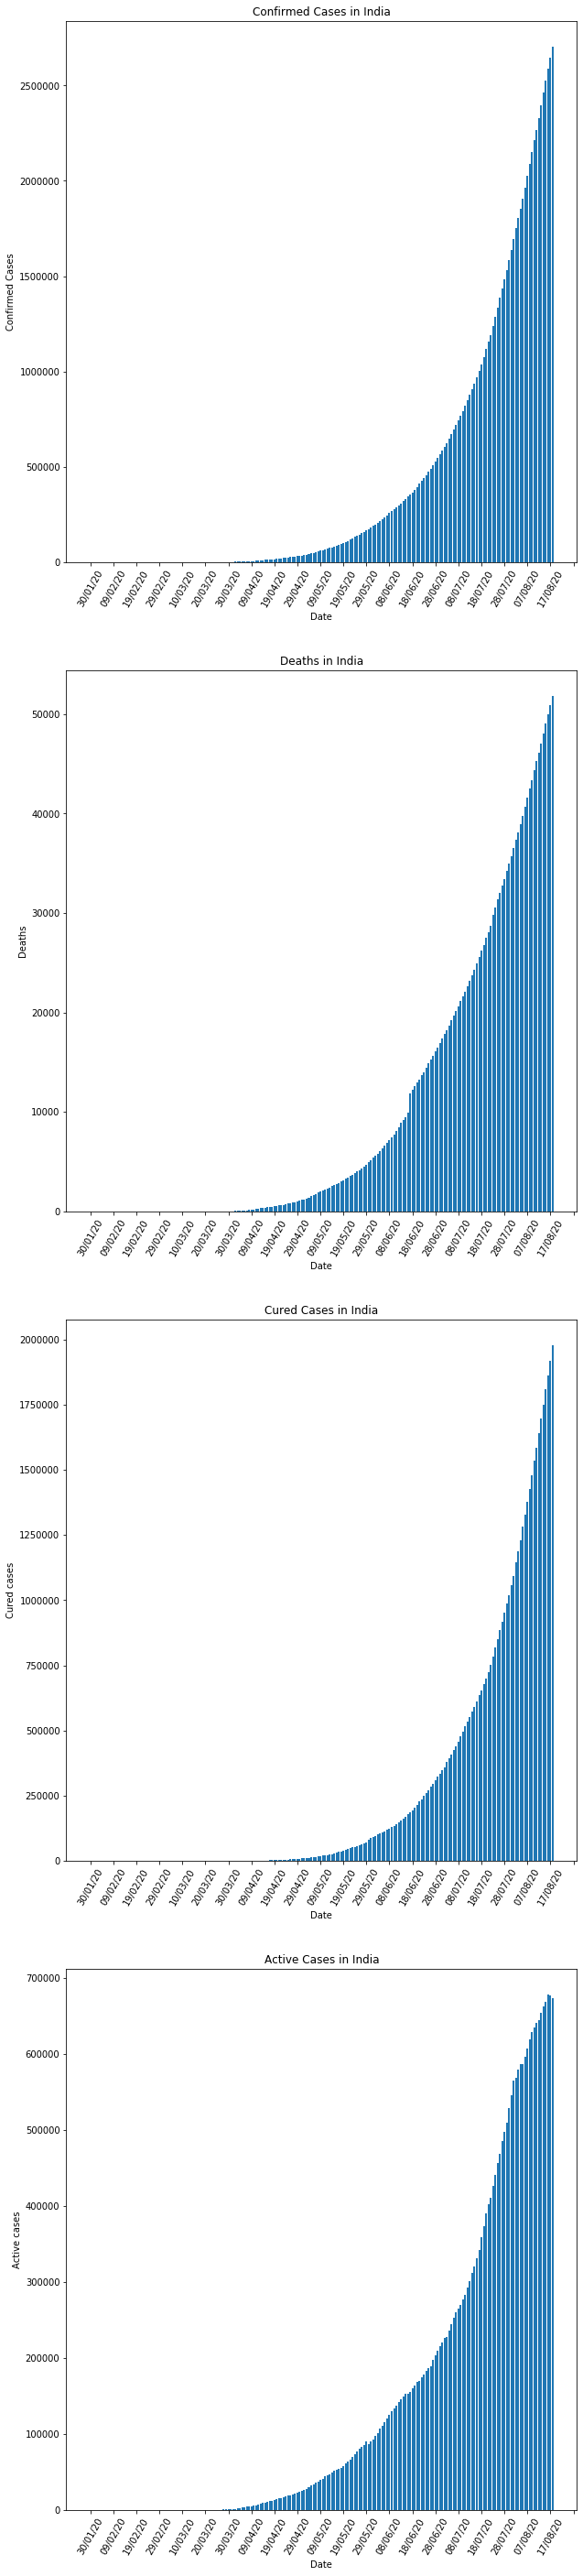

In [629]:
x=data_India.shape[0]
fig = plt.figure(figsize = (10, 50))
plt.subplot(4,1,1)

# Code for plotting Confirmed cases
plt.bar(data_India['Date'],data_India['Confirmed'])
plt.xticks(np.arange(x+10,step=10),rotation=60)
plt.xlabel('Date')
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in India")
plt.subplot(4,1,2)

# Code for plotting death cases
plt.bar(data_India['Date'],data_India['India_Death'])
plt.xticks(np.arange(x+10,step=10),rotation=60)
plt.xlabel('Date')
plt.ylabel("Deaths")
plt.title("Deaths in India")

#Code for plotting Cured cases
plt.subplot(4,1,3)
plt.bar(data_India['Date'],data_India['India_Cured'])
plt.xticks(np.arange(x+10,step=10),rotation=60)
plt.xlabel('Date')
plt.ylabel("Cured cases")
plt.title("Cured Cases in India")

#Code for plotting Active cases
plt.subplot(4,1,4)
plt.bar(data_India['Date'],data_India['India_Active'])
plt.xticks(np.arange(x+10,step=10),rotation=60)
plt.xlabel('Date')
plt.ylabel("Active cases")
plt.title("Active Cases in India")

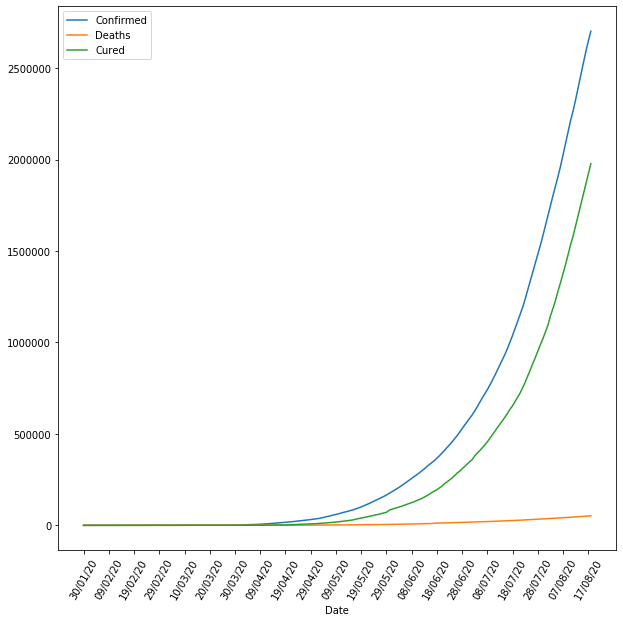

In [760]:
# Comparison of confirmed,death and cured cases in India
fig=plt.figure(figsize=(10,10))
plt.plot(data_India['Date'],data_India['Confirmed'])
plt.plot(data_India['Date'],data_India['India_Death'])
plt.plot(data_India['Date'],data_India['India_Cured'])
plt.xticks(np.arange(0,202,step=10),rotation=60)
plt.xlabel('Date')
plt.legend(["Confirmed","Deaths","Cured"])

Text(0.5, 1.0, 'percentage distribution India')

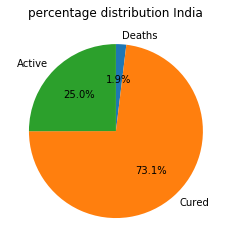

In [889]:
# Percentage distribution of death, cured and active cases
labels=['Deaths','Cured','Active']
values=[data_India['India_Death'].max(),data_India['India_Cured'].max(),data_India['India_Active'].max()]
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=90,counterclock=False)
plt.title("percentage distribution India")

73.1% of cases are cured, 25% are active while 1.9 % caused death in India

## Analysis of Rajasthan's confirmed, cured, deaths and Active cases

In [748]:
data_Rajasthan=data[data['State/UnionTerritory']=='Rajasthan']
data_Raj=pd.DataFrame(data_Rajasthan,columns=['Date','Confirmed','Deaths','Cured','days_since_start'])
data_Raj['Active']=data_Raj['Confirmed']-data_Raj['Deaths']-data_Raj['Cured']
data_Raj['days_since_start']=data_Raj['days_since_start']-data_Raj['days_since_start'].min()
print(data_Raj)

          Date  Confirmed  Deaths  Cured  days_since_start  Active
36    03/03/20          1       0      0                 0       1
44    04/03/20         15       0      0                 8      15
48    05/03/20         15       0      0                12      15
54    06/03/20         15       0      0                18      15
64    07/03/20         15       0      0                28      15
...        ...        ...     ...    ...               ...     ...
5188  14/08/20      57414     833  41819              5152   14762
5223  15/08/20      58692     846  43897              5187   13949
5258  16/08/20      59979     862  45254              5222   13863
5293  17/08/20      61296     876  46604              5257   13816
5328  18/08/20      62630     887  47654              5292   14089

[169 rows x 6 columns]


Text(0.5, 1.0, 'Active Cases in Rajasthan')

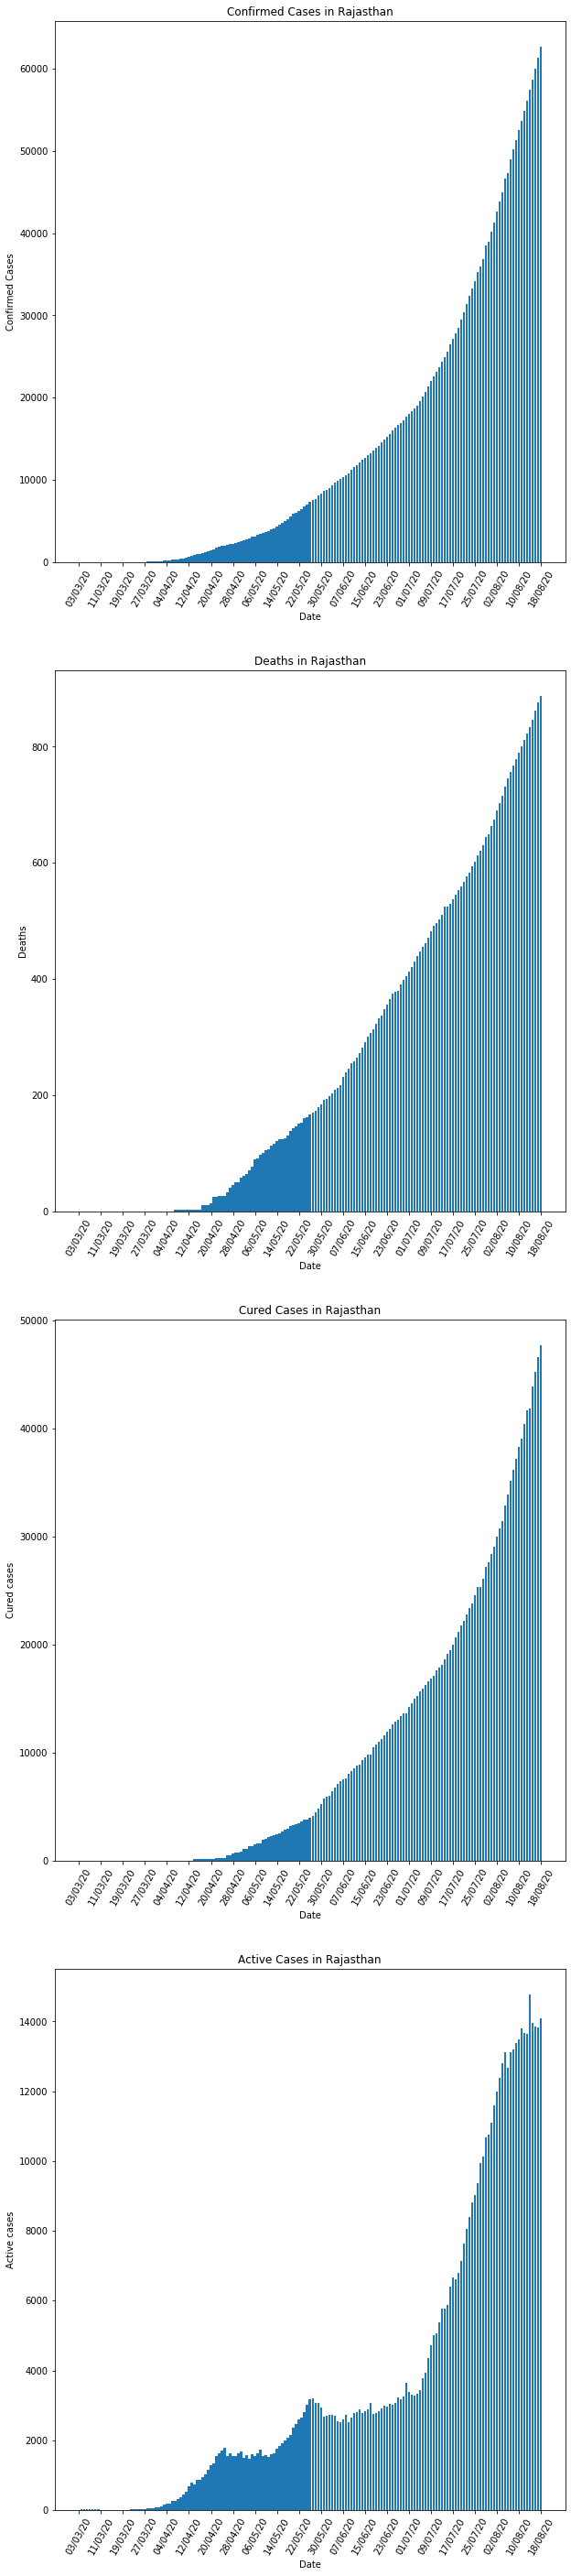

In [749]:

fig = plt.figure(figsize = (10, 50))
plt.subplot(4,1,1)

# Code for plotting Confirmed cases
plt.bar(data_Raj['Date'],data_Raj['Confirmed'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Rajasthan")
plt.subplot(4,1,2)

# Code for plotting death cases
plt.bar(data_Raj['Date'],data_Raj['Deaths'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.ylabel("Deaths")
plt.title("Deaths in Rajasthan")

#Code for plotting Cured cases
plt.subplot(4,1,3)
plt.bar(data_Raj['Date'],data_Raj['Cured'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.ylabel("Cured cases")
plt.title("Cured Cases in Rajasthan")

#Code for plotting Active cases
plt.subplot(4,1,4)
plt.bar(data_Raj['Date'],data_Raj['Active'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.ylabel("Active cases")
plt.title("Active Cases in Rajasthan")

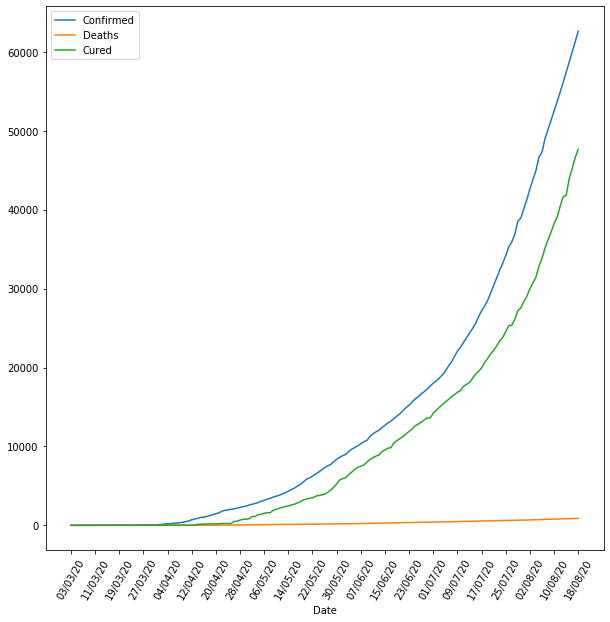

In [757]:
# Comparison of confirmed,death and cured cases in Rajasthan
fig=plt.figure(figsize=(10,10))
plt.plot(data_Raj['Date'],data_Raj['Confirmed'])
plt.plot(data_Raj['Date'],data_Raj['Deaths'])
plt.plot(data_Raj['Date'],data_Raj['Cured'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.legend(["Confirmed","Deaths","Cured"])

Text(0.5, 1.0, 'percentage distribution rajasthan')

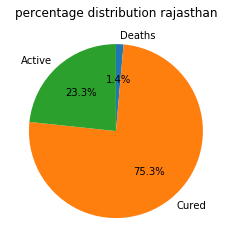

In [890]:
# Percentage distribution of death, cured and active cases
labels=['Deaths','Cured','Active']
values_Raj=[data_Raj['Deaths'].max(),data_Raj['Cured'].max(),data_Raj['Active'].max()]
plt.pie(values_Raj,labels=labels,autopct='%1.1f%%',startangle=90,counterclock=False)
plt.title("percentage distribution rajasthan")

75.3% of cases are cured, 23.3% are active while 1.4 % caused death in rajasthan

## Analysis of Maharashtra's confirmed, cured, deaths and Active cases

In [751]:
data_Maharashtra=data[data['State/UnionTerritory']=='Maharashtra']
data_Maha=pd.DataFrame(data_Maharashtra,columns=['Date','Confirmed','Deaths','Cured','days_since_start'])
data_Maha['Active']=data_Maha['Confirmed']-data_Maha['Deaths']-data_Maha['Cured']
data_Maha['days_since_start']=data_Maha['days_since_start']-data_Maha['days_since_start'].min()
print(data_Maha)

          Date  Confirmed  Deaths   Cured  days_since_start  Active
76    09/03/20          2       0       0                 0       2
91    10/03/20          5       0       0                15       5
97    11/03/20          2       0       0                21       2
120   12/03/20         11       0       0                44      11
133   13/03/20         14       0       0                57      14
...        ...        ...     ...     ...               ...     ...
5180  14/08/20     560126   19063  390958              5104  150105
5215  15/08/20     572734   19427  401442              5139  151865
5250  16/08/20     584754   19749  408286              5174  156719
5285  17/08/20     595865   20037  417123              5209  158705
5320  18/08/20     604358   20265  428514              5244  155579

[163 rows x 6 columns]


Text(0.5, 1.0, 'Active Cases in Maharashtra')

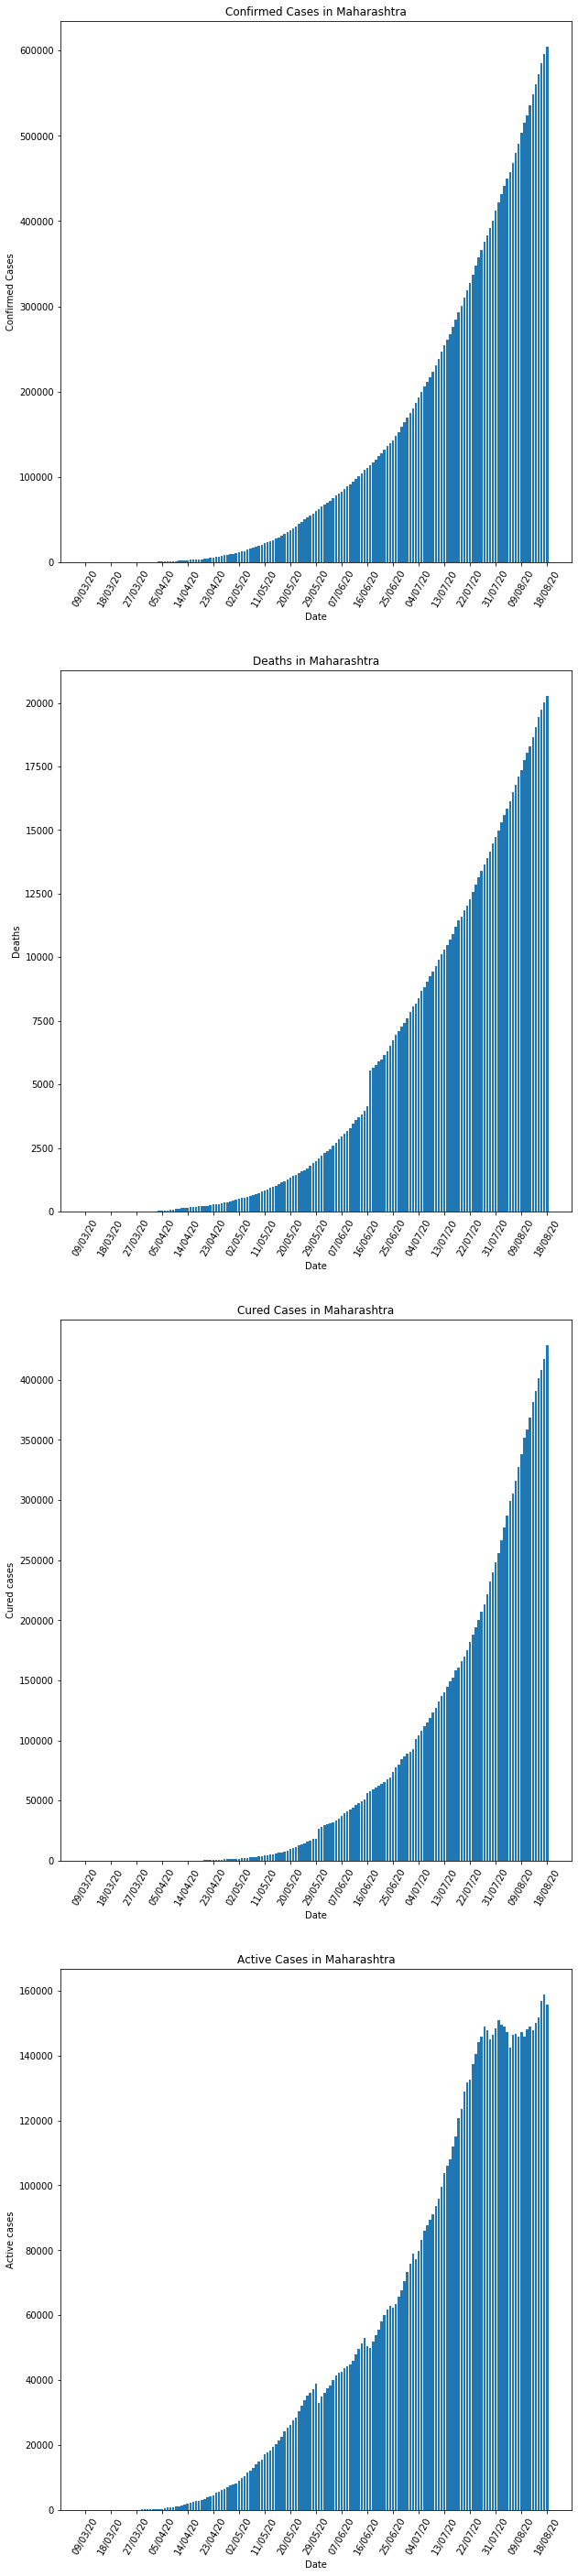

In [752]:
fig = plt.figure(figsize = (10, 50))
plt.subplot(4,1,1)

# Code for plotting Confirmed cases
plt.bar(data_Maha['Date'],data_Maha['Confirmed'])
plt.xticks(np.arange(0,163,step=9),rotation=60)
plt.xlabel('Date')
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Maharashtra")
plt.subplot(4,1,2)

# Code for plotting death cases
plt.bar(data_Maha['Date'],data_Maha['Deaths'])
plt.xticks(np.arange(0,163,step=9),rotation=60)
plt.xlabel('Date')
plt.ylabel("Deaths")
plt.title("Deaths in Maharashtra")

#Code for plotting Cured cases
plt.subplot(4,1,3)
plt.bar(data_Maha['Date'],data_Maha['Cured'])
plt.xticks(np.arange(0,163,step=9),rotation=60)
plt.xlabel('Date')
plt.ylabel("Cured cases")
plt.title("Cured Cases in Maharashtra")

#Code for plotting Active cases
plt.subplot(4,1,4)
plt.bar(data_Maha['Date'],data_Maha['Active'])
plt.xticks(np.arange(0,163,step=9),rotation=60)
plt.xlabel('Date')
plt.ylabel("Active cases")
plt.title("Active Cases in Maharashtra")

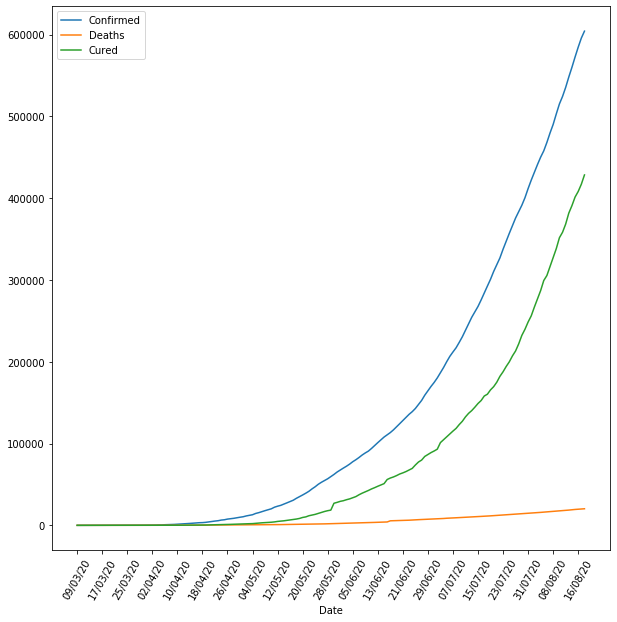

In [758]:
# Comparison of confirmed,death and cured cases in maharashtra
fig=plt.figure(figsize=(10,10))
plt.plot(data_Maha['Date'],data_Maha['Confirmed'])
plt.plot(data_Maha['Date'],data_Maha['Deaths'])
plt.plot(data_Maha['Date'],data_Maha['Cured'])
plt.xticks(np.arange(0,163,step=8),rotation=60)
plt.xlabel('Date')
plt.legend(["Confirmed","Deaths","Cured"])

Text(0.5, 1.0, 'percentage distribution Maharashtra')

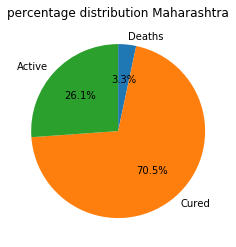

In [891]:
# Percentage distribution of death, cured and active cases
labels=['Deaths','Cured','Active']
values_Maha=[data_Maha['Deaths'].max(),data_Maha['Cured'].max(),data_Maha['Active'].max()]
plt.pie(values_Maha,labels=labels,autopct='%1.1f%%',startangle=90,counterclock=False)
plt.title("percentage distribution Maharashtra")

70.5% of cases are cured, 26.1% are active while 3.3 % caused death in Maharashtra

## Analysis of Uttar pradesh' confirmed, cured, deaths and Active cases

In [754]:
data_Uttar_Pradesh=data[data['State/UnionTerritory']=='Uttar Pradesh']
data_UP=pd.DataFrame(data_Uttar_Pradesh,columns=['Date','Confirmed','Deaths','Cured','days_since_start'])
data_UP['Active']=data_UP['Confirmed']-data_UP['Deaths']-data_UP['Cured']
data_UP['days_since_start']=data_UP['days_since_start']-data_UP['days_since_start'].min()
print(data_UP)

          Date  Confirmed  Deaths   Cured  days_since_start  Active
39    04/03/20          6       0       0                 0       6
50    05/03/20          7       0       0                11       7
55    06/03/20          7       0       0                16       7
58    07/03/20          7       0       0                19       7
72    08/03/20          7       0       0                33       7
...        ...        ...     ...     ...               ...     ...
5194  14/08/20     140775    2280   88786              5155   49709
5229  15/08/20     145287    2335   92526              5190   50426
5264  16/08/20     150061    2393   96231              5225   51437
5299  17/08/20     154418    2449  100432              5260   51537
5334  18/08/20     158216    2515  104808              5295   50893

[168 rows x 6 columns]


Text(0.5, 1.0, 'Active Cases in Uttar Pradesh')

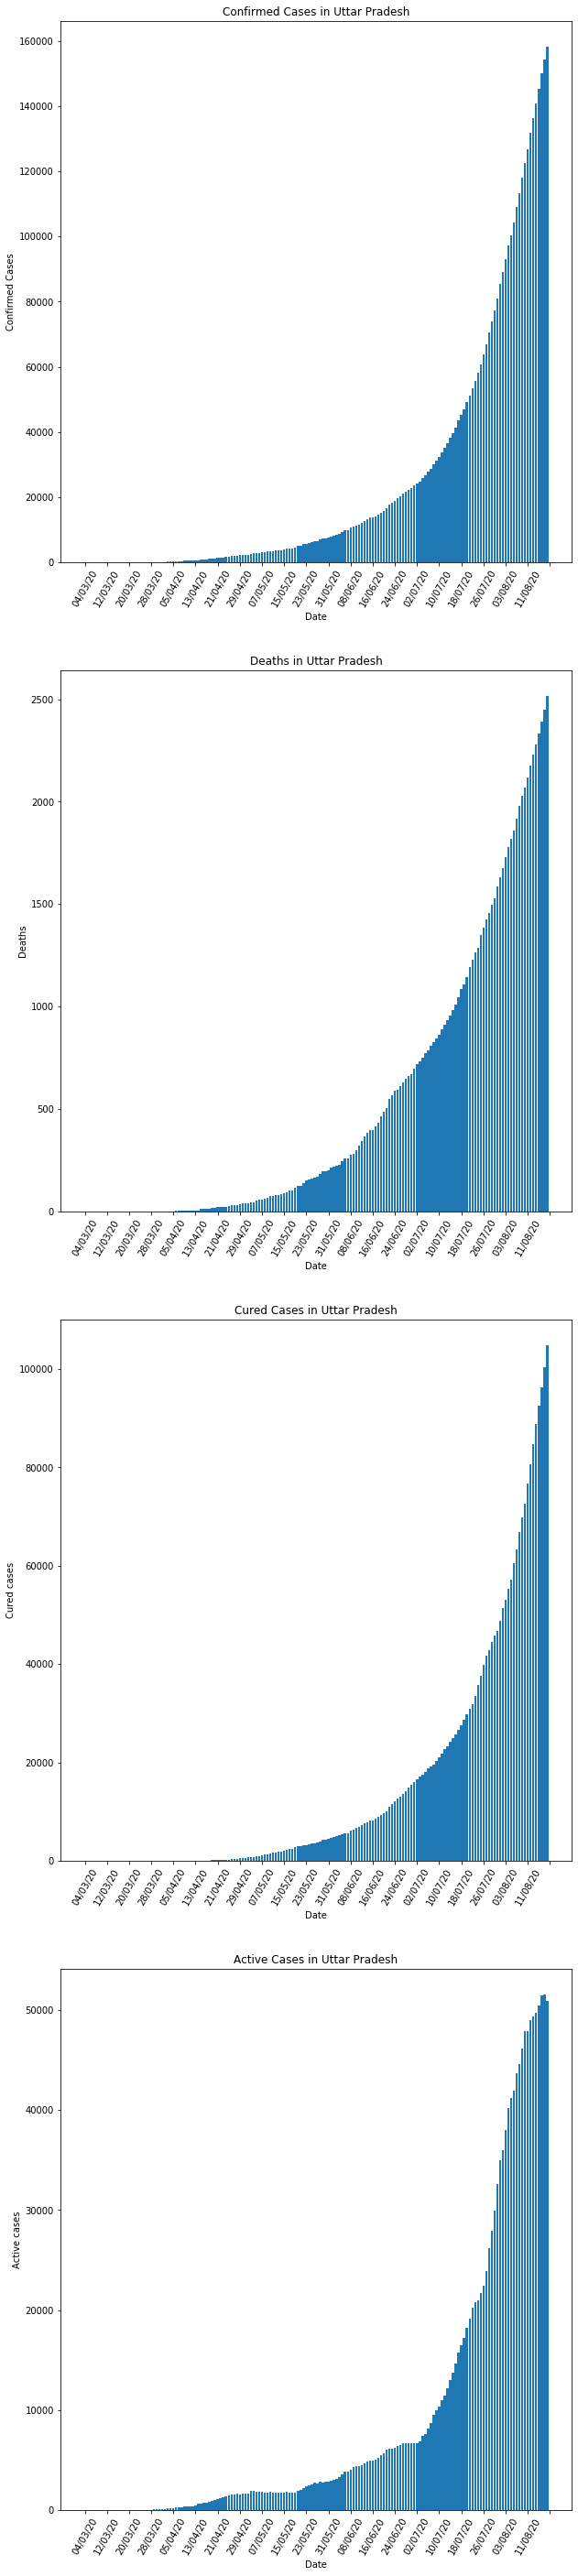

In [755]:
fig = plt.figure(figsize = (10, 50))
plt.subplot(4,1,1)

# Code for plotting Confirmed cases
plt.bar(data_UP['Date'],data_UP['Confirmed'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Uttar Pradesh")
plt.subplot(4,1,2)

# Code for plotting death cases
plt.bar(data_UP['Date'],data_UP['Deaths'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.ylabel("Deaths")
plt.title("Deaths in Uttar Pradesh")

#Code for plotting Cured cases
plt.subplot(4,1,3)
plt.bar(data_UP['Date'],data_UP['Cured'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.ylabel("Cured cases")
plt.title("Cured Cases in Uttar Pradesh")

#Code for plotting Active cases
plt.subplot(4,1,4)
plt.bar(data_UP['Date'],data_UP['Active'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.ylabel("Active cases")
plt.title("Active Cases in Uttar Pradesh")

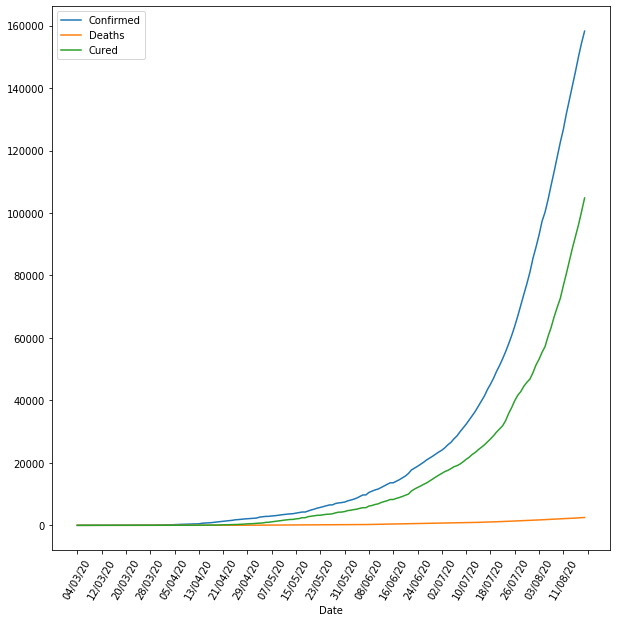

In [761]:
# Comparison of confirmed,death and cured cases in Uttar Pradesh
fig=plt.figure(figsize=(10,10))
plt.plot(data_UP['Date'],data_UP['Confirmed'])
plt.plot(data_UP['Date'],data_UP['Deaths'])
plt.plot(data_UP['Date'],data_UP['Cured'])
plt.xticks(np.arange(0,169,step=8),rotation=60)
plt.xlabel('Date')
plt.legend(["Confirmed","Deaths","Cured"])

Text(0.5, 1.0, 'percentage distribution Uttar Pradesh')

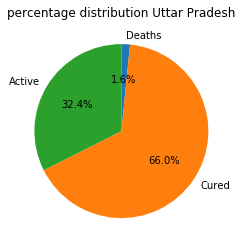

In [893]:
# Percentage distribution of death, cured and active cases
labels=['Deaths','Cured','Active']
values_UP=[data_UP['Deaths'].max(),data_UP['Cured'].max(),data_UP['Active'].max()]
plt.pie(values_UP,labels=labels,autopct='%1.1f%%',startangle=90,counterclock=False)
plt.title("percentage distribution Uttar Pradesh")

66% of cases are cured, 32.4% are active while 1.6 % caused death in Uttarpradesh

## From All the analysis done above it can be seen that increment in covid cases and Curing is exponential in India as well as all 3 states analysed above, and Curing rate is little lesser than confirmed, almost 73% cases are getting recovered in India.

## Fitting and Prediction

## Defining a function on dataset for fitting and prediction

In [763]:
def fitting_prediction(dataset):
   dic={}
   m=dataset.shape[0]
   X=dataset['days_since_start'].values.reshape(m,1)
   Y=dataset['Confirmed'].values.reshape(m,1)
    
   # finding optimum degree for polynomial regression with minimum mean_squared_error
   for n in range(1,20):
      poly=PolynomialFeatures(degree=n)
      X_poly=poly.fit_transform(X)
      model=LinearRegression()
      poly_model=model.fit(X_poly,Y)
      y_pred=poly_model.predict(X_poly)
      dic[n]=np.sqrt(mean_squared_error(Y,y_pred))
   min_value=min(dic.values())
   optimum_n=[key for key in dic.keys() if dic[key]==min_value]
   print("Optimum value of polynomial degree:",optimum_n[0], "and Root mean sqaure error:", min_value)
   
   #fitting optimum n
   poly=PolynomialFeatures(degree=optimum_n[0])
   X_poly=poly.fit_transform(X)
   model=LinearRegression()
   poly_model=model.fit(X_poly,Y)
   y_pred=poly_model.predict(X_poly)
  
   #plotting predicted cases and true cases with days
   plt.fig = plt.figure(figsize = (10,10))
   plt.plot(X,Y)
   plt.plot(X,y_pred)
   plt.legend(["True cases","Predicted cases"])
   plt.title('Confirmed cases polynomial regression prediction')
   plt.xlabel('Days Since Start')
    
   #Predictions
   #Total cases after 31 days
   Total_Confirmed_after_31days=poly_model.predict(poly.transform(np.array(X.max()+31).reshape(1,1)))
   print("Number of Predicted total Confirmed Cases after 31 days i.e on 18th sept 2020:",Total_Confirmed_after_31days[0][0])
    
   # Total cases in next 31 days
   Confirmed_in_next_31days=Total_Confirmed_after_31days[0][0]-Y.max()
   print("Number of Predicted Confirmed Cases in next 31 days:", Confirmed_in_next_31days)

   # Total cases after 61 days
   Total_Confirmed_after_61days=poly_model.predict(poly.transform(np.array(X.max()+61).reshape(1,1)))
   print("Number of Predicted total Confirmed Cases after 61 days i.e on 18th oct 2020:",Total_Confirmed_after_61days[0][0])
    
   # Total cases in next 61 days
   Confirmed_in_next_61days=Total_Confirmed_after_61days[0][0]-Y.max()
   print("Number of Predicted Confirmed Cases in next 61 days:", Confirmed_in_next_61days)

## Fitting and Prediction of Confirmed Cases in India

Optimum value of polynomial degree: 14 and Root mean sqaure error: 3077.608444765778
Number of Predicted total Confirmed Cases after 31 days i.e on 18th sept 2020: 7712928.232182279
Number of Predicted Confirmed Cases in next 31 days: 5010186.232182279
Number of Predicted total Confirmed Cases after 61 days i.e on 18th oct 2020: 155033528.77289084
Number of Predicted Confirmed Cases in next 61 days: 152330786.77289084


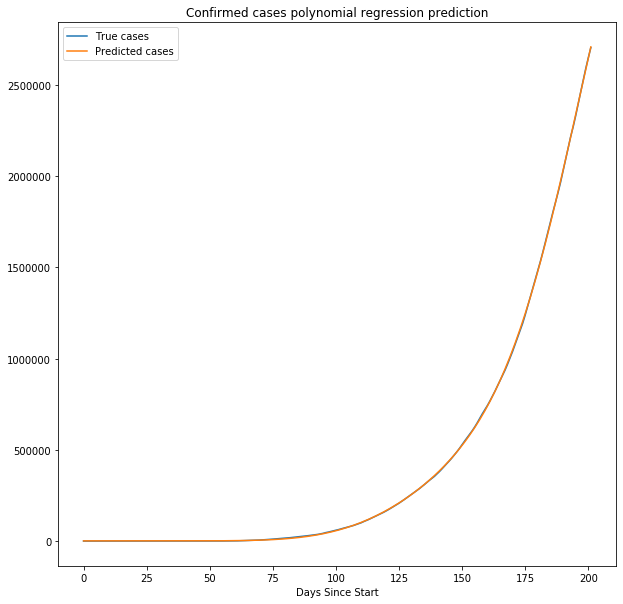

In [764]:
fitting_prediction(data_India)

## Fitting and Prediction of Confirmed Cases in Rajasthan

Optimum value of polynomial degree: 7 and Root mean sqaure error: 188.43622891325748
Number of Predicted total Confirmed Cases after 31 days i.e on 18th sept 2020: 63599.20486252849
Number of Predicted Confirmed Cases in next 31 days: 969.2048625284879
Number of Predicted total Confirmed Cases after 61 days i.e on 18th oct 2020: 64597.11506090826
Number of Predicted Confirmed Cases in next 61 days: 1967.1150609082615


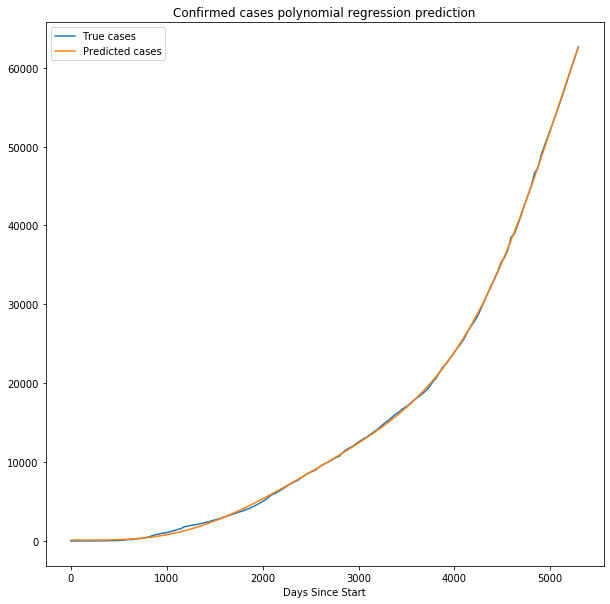

In [765]:
fitting_prediction(data_Raj)

## Fitting and Prediction of Confirmed Cases in Maharashtra

Optimum value of polynomial degree: 7 and Root mean sqaure error: 1981.1923558346548
Number of Predicted total Confirmed Cases after 31 days i.e on 18th sept 2020: 611079.1143343127
Number of Predicted Confirmed Cases in next 31 days: 6721.114334312733
Number of Predicted total Confirmed Cases after 61 days i.e on 18th oct 2020: 619530.3802766702
Number of Predicted Confirmed Cases in next 61 days: 15172.380276670214


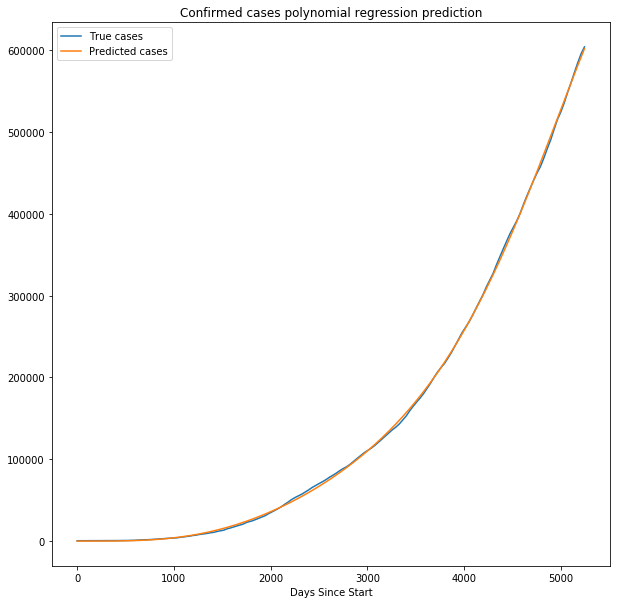

In [766]:
fitting_prediction(data_Maha)

## Fitting and Prediction of Confirmed Cases in Uttar Pradesh

Optimum value of polynomial degree: 9 and Root mean sqaure error: 522.7381365309712
Number of Predicted total Confirmed Cases after 31 days i.e on 18th sept 2020: 161762.96200527673
Number of Predicted Confirmed Cases in next 31 days: 3546.9620052767277
Number of Predicted total Confirmed Cases after 61 days i.e on 18th oct 2020: 164945.4500075565
Number of Predicted Confirmed Cases in next 61 days: 6729.450007556501


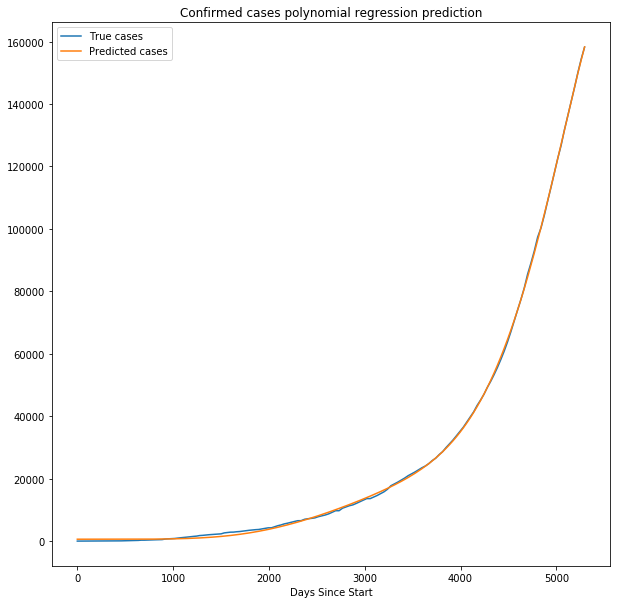

In [767]:
fitting_prediction(data_UP)

## StateWise Analysis

In [852]:
# Creating DataFrame confirmed, death and cured cases statewise
states=data['State/UnionTerritory'].drop_duplicates()
confirmed=[]
cured=[]
deaths=[]
for state in states:
    y=data[data['State/UnionTerritory']==state].max()
    confirmed.append(y['Confirmed'])
    cured.append(y['Cured'])
    deaths.append(y['Deaths'])
states_data=pd.DataFrame(list(zip(confirmed,cured,deaths)),columns=['confirmed','cured','deaths'],index=states)
states_data=states_data[:39][:]
states_data.drop('Cases being reassigned to states',inplace=True)
states_data['percent_cured']=states_data['cured']/states_data['confirmed']*100
states_data['percent_death']=states_data['deaths']/states_data['confirmed']*100
states_data

confirmed   cured  deaths  \
State/UnionTerritory                                                  
Kerala                                        46140   30025     169   
Telengana                                     93937   72202     711   
Delhi                                        153367  138301    4214   
Rajasthan                                     62630   47654     887   
Uttar Pradesh                                158216  104808    2515   
Haryana                                       48040   40610     550   
Ladakh                                         1966    1368      14   
Tamil Nadu                                   343945  283937    5886   
Karnataka                                    233283  148562    4062   
Maharashtra                                  604358  428514   20265   
Punjab                                        32696   20180     863   
Jammu and Kashmir                             28892   21296     548   
Andhra Pradesh                               296609  209100    2732   
Uttarakhand                                   12493    8485     158   
Odisha                                        62294   43780     353   
Puducherry                                     8029    4627     114   
West Bengal                                  119578   89703    2473   
Chhattisgarh                                  16025   10598     150   
Chandigarh                                     2216    1183      30   
Gujarat                                       79710   62595    2800   
Himachal Pradesh                               4174    2834      19   
Madhya Pradesh                                46385   35025    1128   
Bihar                                        106307   76452     468   
Manipur                                        4687    2734      17   
Mizoram                                         789     372       0   
Andaman and Nicobar Islands                    2445    1325      29   
Goa                                           11994    8058     111   
Unassigned                                       77       0       0   
Assam                                         79667   56734     197   
Jharkhand                                     23752   15051     250   
Arunachal Pradesh                              2741    1893       5   
Tripura                                        7409    5404      62   
Nagaland                                       3455    1530       8   
Meghalaya                                      1418     679       6   
Dadar Nagar Haveli                               26       2       0   
Sikkim                                         1187     701       1   
Daman & Diu                                       2       0       0   
Dadra and Nagar Haveli and Daman and Diu       1908    1459       2   

                                          percent_cured  percent_death  
State/UnionTerritory                                                    
Kerala                                        65.073689       0.366277  
Telengana                                     76.862152       0.756890  
Delhi                                         90.176505       2.747658  
Rajasthan                                     76.088137       1.416254  
Uttar Pradesh                                 66.243616       1.589599  
Haryana                                       84.533722       1.144879  
Ladakh                                        69.582909       0.712106  
Tamil Nadu                                    82.553024       1.711320  
Karnataka                                     63.683166       1.741233  
Maharashtra                                   70.904001       3.353145  
Punjab                                        61.720088       2.639467  
Jammu and Kashmir                             73.708985       1.896719  
Andhra Pradesh                                70.496849       0.921078  
Uttarakhand                                   67.918034       1.264708  
Odisha                           

## Analysis of confirmed cases state wise

Text(0, 0.5, 'Confirmed Cases')

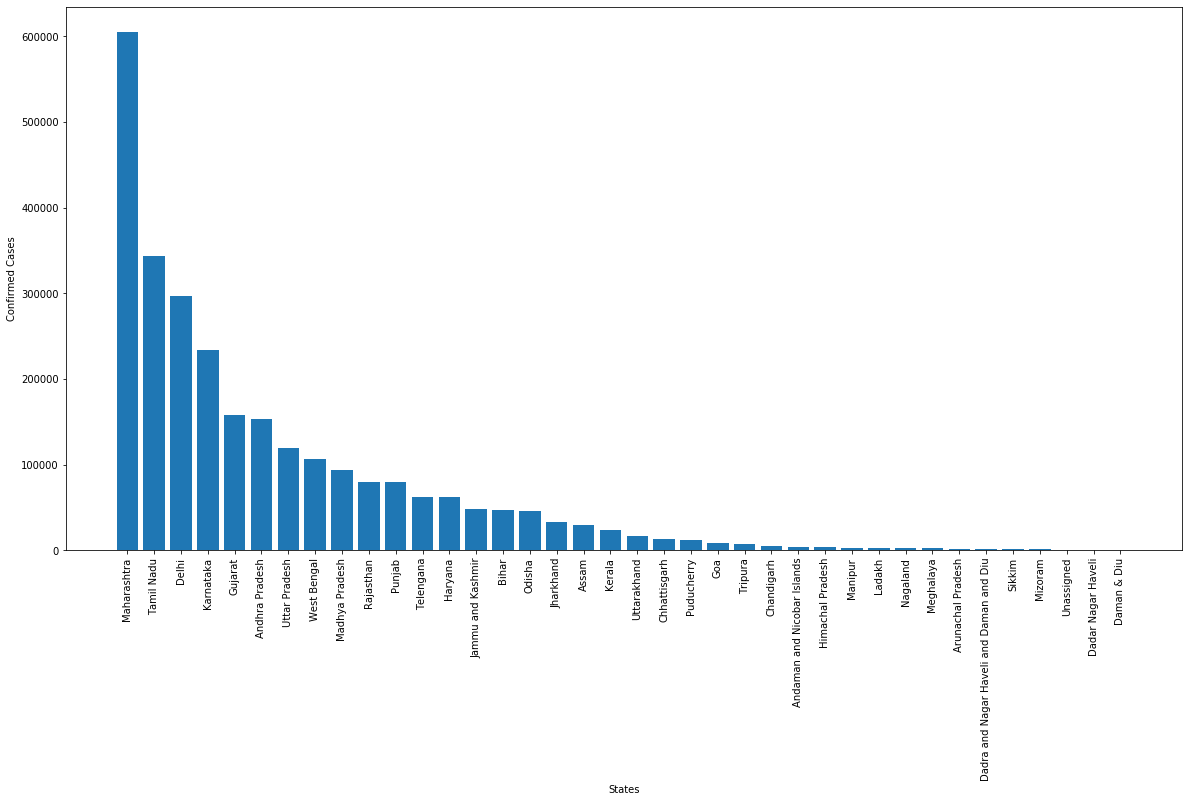

In [866]:
states_data_sorted_confirmed=states_data.sort_values('confirmed',ascending=False)
plt.fig = plt.figure(figsize = (20,10))
plt.bar(states_data_sorted.index,states_data_sorted_confirmed['confirmed'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Confirmed Cases')

In [867]:
print("% of cases in Maharashtra:",604358/states_data['confirmed'].sum()*100)
print("% of cases in Tamil Nadu:",334395/states_data['confirmed'].sum()*100)
print("% of casesin Delhi:",153367/states_data['confirmed'].sum()*100)

% of cases in Maharashtra: 22.360052196813214
% of cases in Tamil Nadu: 12.371954461351308
% of casesin Delhi: 5.674276050401669


From above plot it can be seen that Maharashtra (6,04,358), Tamil Nadu (3,34,395) and Dehi (1,53,367) have most number of cases till 18/08/2020 in order.

22.36% of total cases of India are in Mahasrashtra, 12.37% of total cases of India are in Tamil nadu and 5.67% of total cases of India are in Delhi

## Analysis of deaths state wise

Text(0, 0.5, 'Deaths')

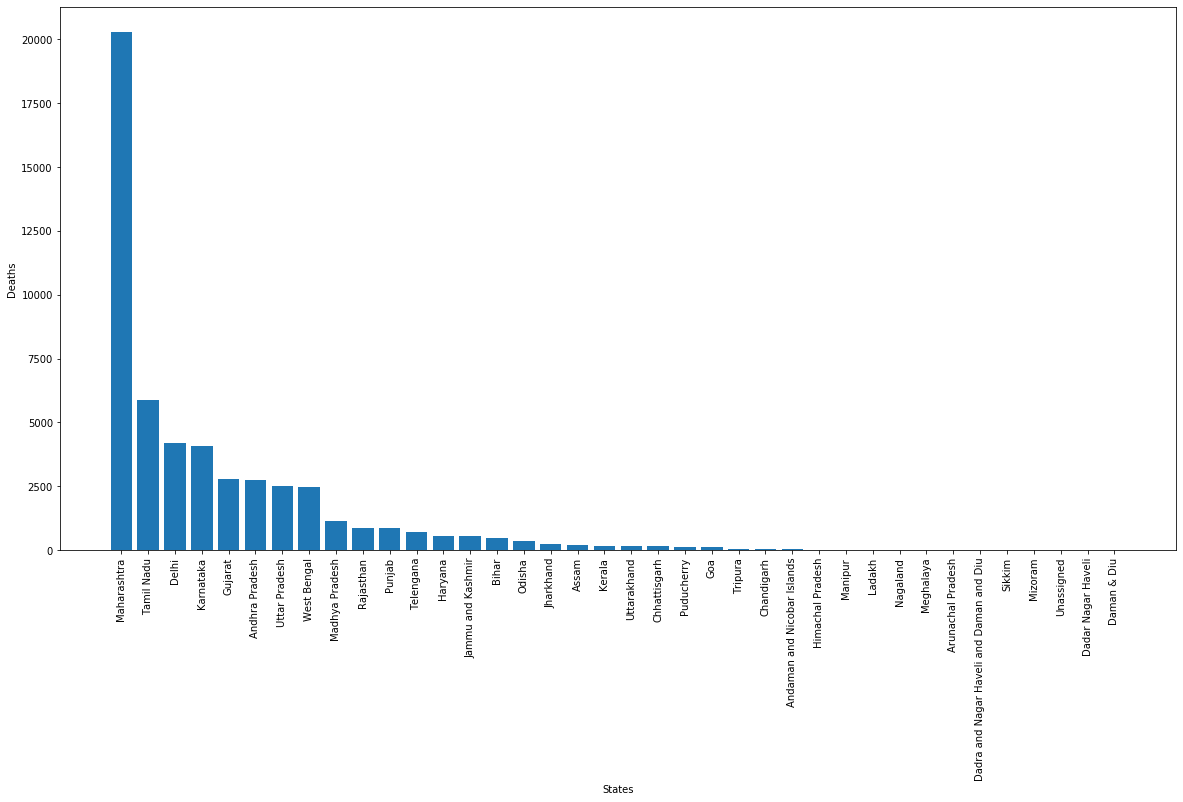

In [868]:
states_data_sorted_deaths=states_data.sort_values('deaths',ascending=False)
plt.fig = plt.figure(figsize = (20,10))
plt.bar(states_data_sorted_deaths.index,states_data_sorted_deaths['deaths'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Deaths')

In [869]:
print("% of deaths in Maharashtra:",20265/states_data['deaths'].sum()*100)
print("% of deaths in Tamil Nadu:",5886/states_data['deaths'].sum()*100)
print("% of deaths in Delhi:",4241/states_data['deaths'].sum()*100)

% of deaths in Maharashtra: 39.12388748383111
% of deaths in Tamil Nadu: 11.363592486051315
% of deaths in Delhi: 8.187732880282642


From above plot it can be seen that Maharashtra (20,265), Tamil Nadu (5,886) and Dehi (4,241) have most number of cases till 18/08/2020 in order.

39.12% of total cases of India are in Mahasrashtra, 11.36% of total cases of India are in Tamil nadu and 8.18% of total cases of India are in Delhi

## Analysis of percentage_cured state wise

Text(0, 0.5, 'Percent_cured')

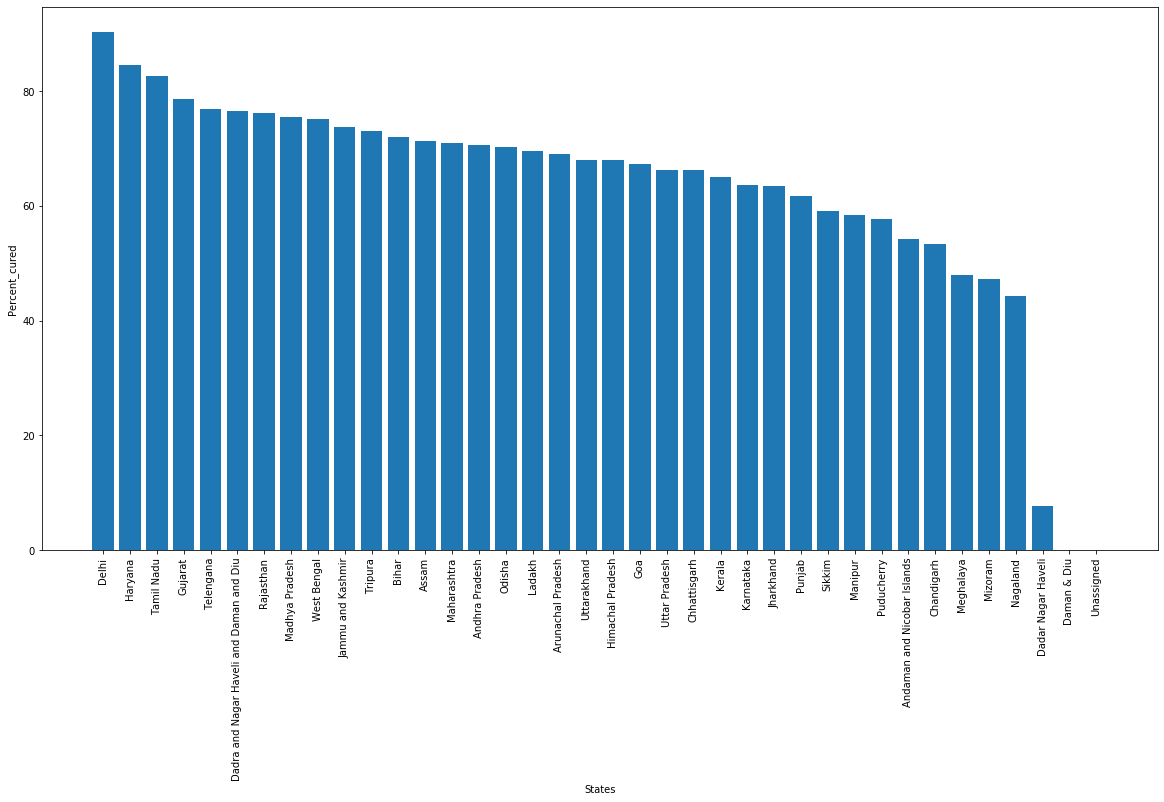

In [872]:
states_data_percent_cured=states_data.sort_values('percent_cured',ascending=False)
plt.fig = plt.figure(figsize = (20,10))
plt.bar(states_data_percent_cured.index,states_data_percent_cured['percent_cured'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Percent_cured')

From above graph it can be seen that Delhi has the highest curing rate of 90.17% then Haryana 84.53% and then Gujarat 78.52%

## Analysis of percentage_death state wise

Text(0, 0.5, 'Percent_deaths')

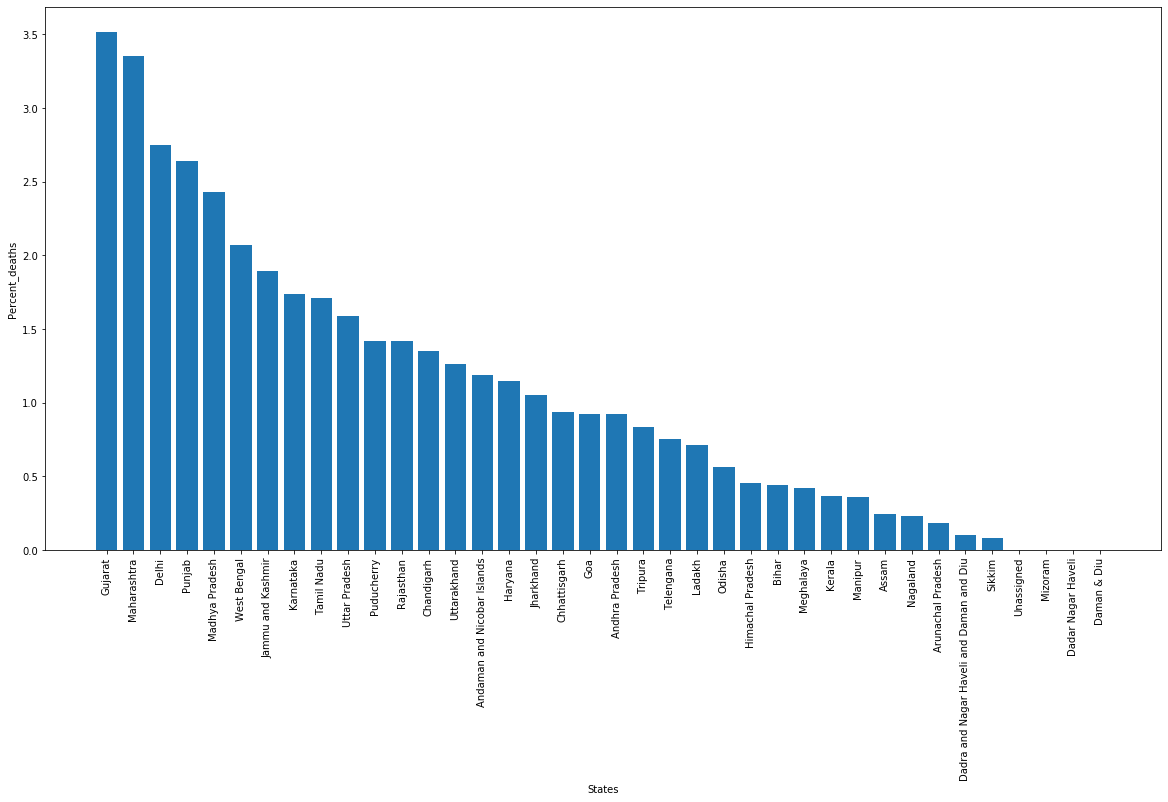

In [873]:
states_data_percent_deaths=states_data.sort_values('percent_death',ascending=False)
plt.fig = plt.figure(figsize = (20,10))
plt.bar(states_data_percent_deaths.index,states_data_percent_deaths['percent_death'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Percent_deaths')

From above plot it can be concluded that most cases converted to death are in Gujarat 3.51%, then Maharashtra 3.35% and then in Delhi 2.747%